# Time Series Analysis of Cryptocurrency Ethereum

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel(r'/Users/radhikagarg/Desktop/data/Ethereum.xlsx')
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount
1156,2021-03-02,1488.62,1570.00,1602.13,1457.22,1740000.0,-0.0518,171484736319,966176
1157,2021-03-03,1571.05,1488.80,1653.04,1477.72,1170000.0,0.0554,181069778316,1237215
1158,2021-03-04,1538.61,1567.84,1623.73,1506.86,1700000.0,-0.0206,177191062441,1125118
1159,2021-03-05,1530.29,1539.73,1548.71,1443.32,1670000.0,-0.0054,176219185802,1000913
1160,2021-03-06,1649.19,1530.24,1670.01,1514.62,2070000.0,0.0777,190201808027,1188531


In [3]:
print(df.info())
# 1161 rows depicting daily bitcoin prices from 2018 to 2021 with no issing data values in any feild

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1161 non-null   datetime64[ns]
 1   Price       1161 non-null   float64       
 2   Open        1161 non-null   float64       
 3   High        1161 non-null   float64       
 4   Low         1161 non-null   float64       
 5   Vol.        1161 non-null   float64       
 6   Change %    1161 non-null   float64       
 7   MktCap      1161 non-null   int64         
 8   Tradecount  1161 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 81.8 KB
None


Text(0.5, 1.0, 'Closing price Trend')

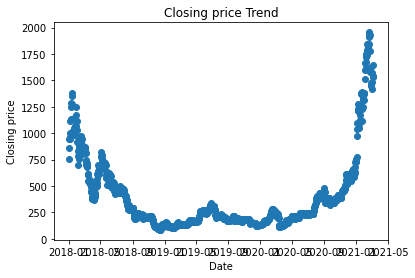

In [4]:
# PLOTTING Closing Prices against Dates.
plt.scatter(df.Date,df.Price)
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Closing price Trend")

In [5]:
import datetime
df['Date']=pd.to_datetime(df['Date']) # setting month as index to exclude month from describe calcs
df.head()
df.describe()

,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount
count,1161.000000,1161.000000,1161.000000,1161.000000,1.161000e+03,1161.000000,1.161000e+03,1.161000e+03
mean,386.210999,385.438475,400.370930,368.365668,9.194901e+06,0.002083,4.135873e+10,2.728164e+05
std,347.660578,345.849831,363.264265,325.298086,8.827519e+06,0.051993,3.835001e+10,3.102951e+05
min,83.810000,83.810000,85.070000,77.650000,3.701700e+05,-0.445500,8.751210e+09,8.507000e+03
25%,173.190000,173.190000,177.630000,168.740000,2.560000e+06,-0.021700,1.871194e+10,1.154980e+05
50%,236.100000,236.100000,243.430000,228.160000,7.630000e+06,0.000900,2.598206e+10,1.695150e+05
75%,461.520000,461.510000,473.580000,446.700000,1.189000e+07,0.027500,4.809157e+10,2.854960e+05
max,1955.590000,1955.540000,2040.790000,1892.700000,7.747000e+07,0.258800,2.249103e+11,2.557613e+06


In [6]:
df.set_index('Date',inplace=True)

# Differencing

Time-Series Components
There are three components of time-series data:
Trend: the movement of the data on a larger scale (moving average)
Seasonality: repeated seasonal fluctuations
Residual: any fluctuations not captured from trend or seasonality (should be random)
A time series can be modeled as an additive or multiplicative time-series depending on its nature of trend and seasonality.
Additive Time Series
observed = Trend + Seasonal + Residual
Multiplicative Time Series
observed = Trend × Seasonal × Residual

Based on data values, if the magnitude of seasonality changes over time (see image on the right), then the data 
is multiplicative. Our data, however, does not show clear evidence of growing or shrinking magnitude of seasonality,
so we assume it is an additive time series. Please take a look at it once again.

we are using freq= 7*4*3 (~3 months) to model our data. You can tune it by holding into trend visualizations. If the trend's visualizations are smooth, and the seasonal has patterns, then it's good to continue. 
The extrapolate_trend='freq' will make the length of the residual, trend, and seasonal the same by taking care of any missing values at the beginning of the series. 

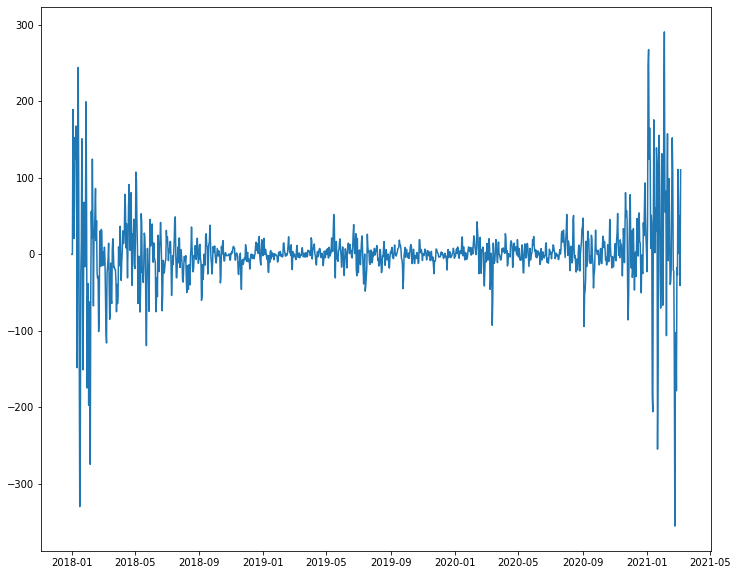

In [7]:
plt.figure(figsize=(12,10))
plt.plot(df['Price'].diff(2).fillna(0))

#hit and trial start with 5 fluctuate

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # Super not sure how to determin this... We'll have to do some research
    # 7 to 14 days seems reasonable to find overall trends
    rolmean = pd.Series(timeseries).rolling(window=14).mean()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

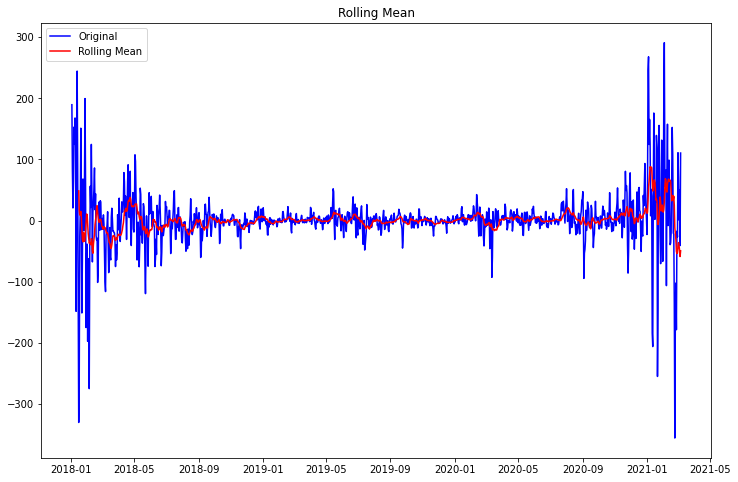

Results of Dickey-Fuller Test:
Test Statistic                -6.690339e+00
p-value                        4.124943e-09
#Lags Used                     2.300000e+01
Number of Observations Used    1.135000e+03
Critical Value (1%)           -3.436125e+00
Critical Value (5%)           -2.864090e+00
Critical Value (10%)          -2.568128e+00
dtype: float64


In [10]:
#prev 2 day dependency is seen
df['second_difference'] = df.Price - df.Price.shift(2)  
test_stationarity(df.second_difference.dropna(inplace=False))

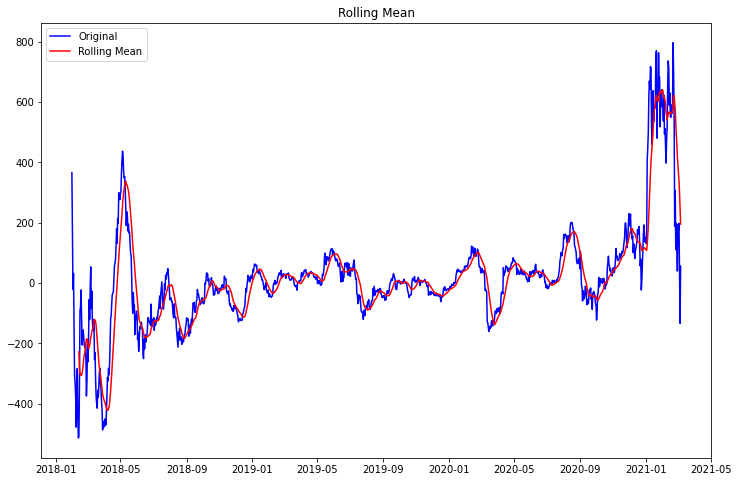

Results of Dickey-Fuller Test:
Test Statistic                   -5.364388
p-value                           0.000004
#Lags Used                       23.000000
Number of Observations Used    1107.000000
Critical Value (1%)              -3.436271
Critical Value (5%)              -2.864154
Critical Value (10%)             -2.568162
dtype: float64


In [11]:
#prev 30 day dependency/monthly is not seen
df['monthly_second_difference'] = df.Price - df.Price.shift(30)  
test_stationarity(df.monthly_second_difference.dropna(inplace=False))

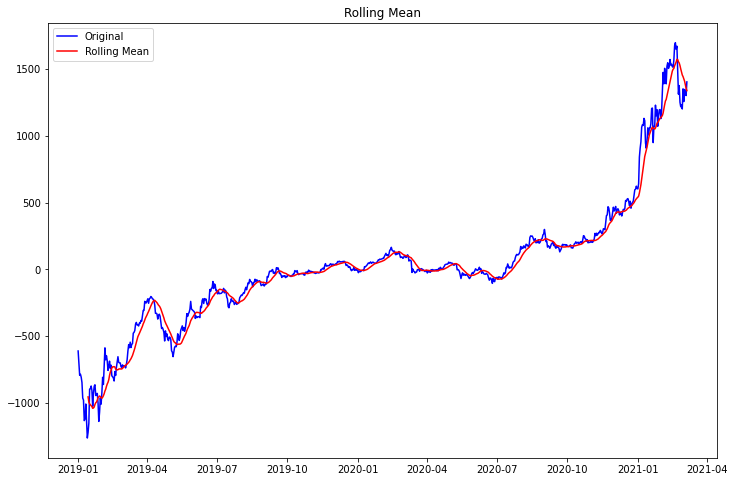

Results of Dickey-Fuller Test:
Test Statistic                  -0.884473
p-value                          0.793043
#Lags Used                      19.000000
Number of Observations Used    776.000000
Critical Value (1%)             -3.438805
Critical Value (5%)             -2.865272
Critical Value (10%)            -2.568757
dtype: float64


In [12]:
#prev 365 day dependency/annual is not seen
df['seasonal_difference'] = df.Price - df.Price.shift(365)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

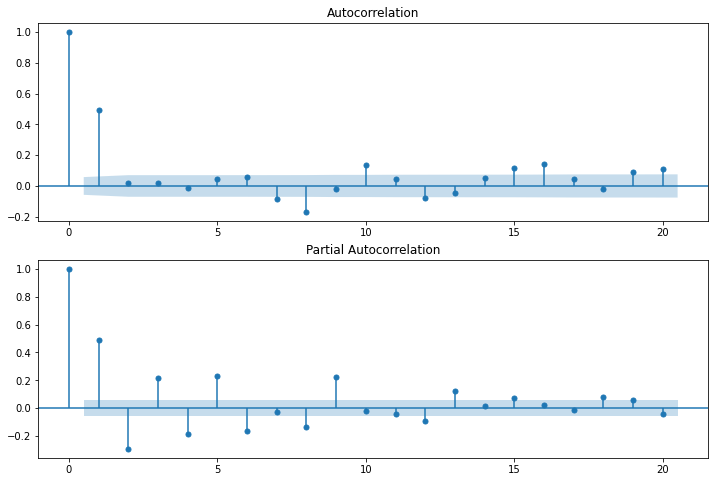

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.second_difference.iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.second_difference.iloc[3:], lags=20, ax=ax2)
plt.show()

#p=2,
#d=2,
#q=2,

In [13]:
df.tail()

,Price,Open,High,Low,Vol.,Change %,MktCap($),Tradecount,second_difference,seasonal_difference
Date,,,,,,,,,,
2021-03-02,1488.62,1570.00,1602.13,1457.22,1740000.0,-0.0518,171484736319,966176,175.89,1256.75
2021-03-03,1571.05,1488.80,1653.04,1477.72,1170000.0,0.0554,181069778316,1237215,197.65,1347.11
2021-03-04,1538.61,1567.84,1623.73,1506.86,1700000.0,-0.0206,177191062441,1125118,27.25,1314.23
2021-03-05,1530.29,1539.73,1548.71,1443.32,1670000.0,-0.0054,176219185802,1000913,-134.05,1301.84
2021-03-06,1649.19,1530.24,1670.01,1514.62,2070000.0,0.0777,190201808027,1188531,55.19,1404.29


# AR Model

ARIMA models will require (p, d, q) arguments as its order, 
where: 
- p: The number of lag included in the model, or also called lag order. Previously defined by looking into PACF visualization
- d: Order of difference. In previous section, we know that doing a difference once made the data stationary. Thus, we will use d=1 on original data.
- q: The size of moving average windows, or also called moving average order. Previously defined by looking into ACF visualization

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Price'],order=(2,2,2))
model_fit=model.fit()

#Based on the model summary, all variables (ar and ma) have a p-value <5%. This means that our model 
#really fits into the train data. The AIC, BIC, and HQIC is a score to measure the goodness of our model based on 
#the train data.

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was p

In [16]:
model_fit.summary()

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Price   No. Observations:                 1159
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -5635.223
Method:                       css-mle   S.D. of innovations             31.192
Date:                Tue, 06 Apr 2021   AIC                          11282.446
Time:                        18:59:34   BIC                          11312.778
Sample:                    01-03-2018   HQIC                         11293.891
                         - 03-06-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0073      0.003      2.628      0.009       0.002       0.013
ar.L1.D2.Price     0.5330        nan        nan        nan         nan         nan
ar.L2.D2.Price     0.0204      0.030      0.683      0.494      -0.038       0.079
ma.L1.D2.Price    -1.5490        nan        nan        nan         nan         nan
ma.L2.D2.Price     0.5490        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7581           +0.0000j            1.7581            0.0000
AR.2          -27.9140           +0.0000j           27.9140            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.8214           +0.0000j            1.8214            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:ylabel='Density'>

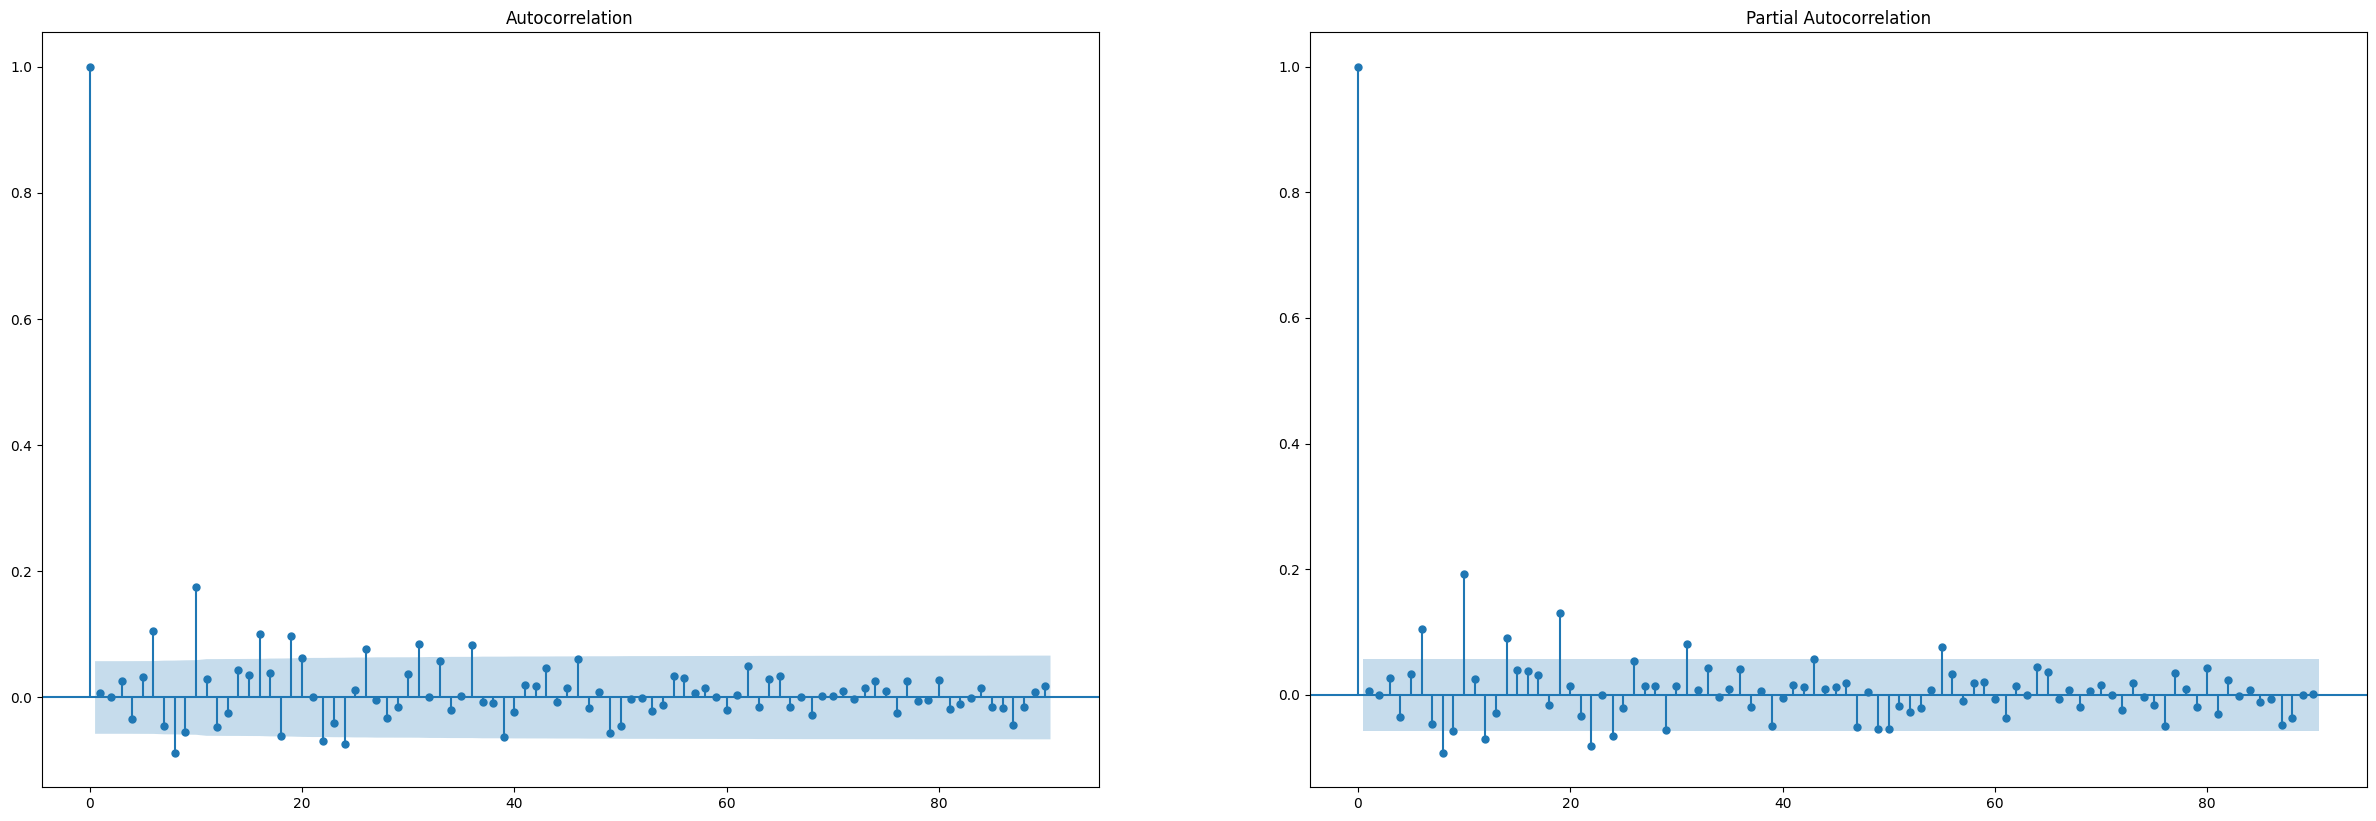

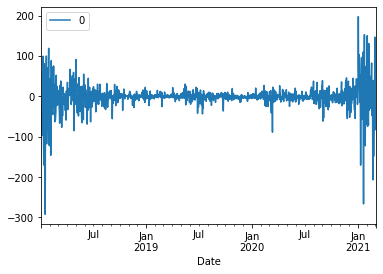

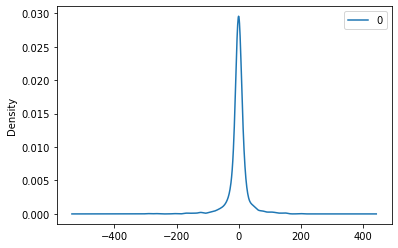

In [17]:
residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1,2,figsize=(30,10), dpi= 100)
sm.graphics.tsa.plot_acf(residuals, lags=90, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=90, ax=axes[1])
residuals.plot()
residuals.plot(kind='kde')
#Now that we have our models, we don’t want the residuals to have autocorrelation. 
#Thus, let’s try to see the ACF-PACF values for each residual lag.

In [18]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Price'], start_p = 1, start_q = 1, 
                          max_p = 2, max_q = 2, m = 1, 
                          start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

#https://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
#https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#period

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=12077.864, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11731.251, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=12075.864, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=11580.044, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=11578.046, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11729.251, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.428 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1161
Model:               SARIMAX(2, 2, 0)   Log Likelihood               -5786.023
Date:                Tue, 06 Apr 2021   AIC                          11578.046
Time:                        19:10:14   BIC                          11593.212
Sample:                             0   HQIC                         11583.769
                               - 1161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6938      0.011    -62.502      0.000      -0.716      -0.672
ar.L2         -0.3547      0.010    -37.113      0.000      -0.373      -0.336
sigma2      1269.1335     18.484     68.663      0.000    1232.906    1305.361
===================================================================================
Ljung-Box (L1) (Q):                   6.32   Jarque-Bera (JB):             11096.05
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.69
Prob(H) (two-sided):                  0.03   Kurtosis:                        18.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


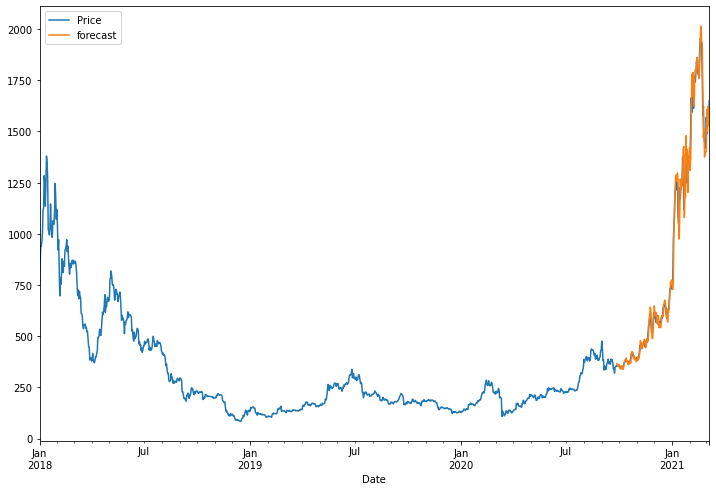

In [22]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(2,2,0),seasonal_order=(0,0,0,0))
model_fit=model.fit()
df['forecast']=model_fit.predict(start=1000,end=1160,dynamic=False)
df[['Price','forecast']].plot(figsize=(12,8))
plt.show()

In [23]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+DateOffset(days=x) for x in range(0,366)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dates_df.tail()

,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount,second_difference,monthly_second_difference,seasonal_difference,forecast
2022-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

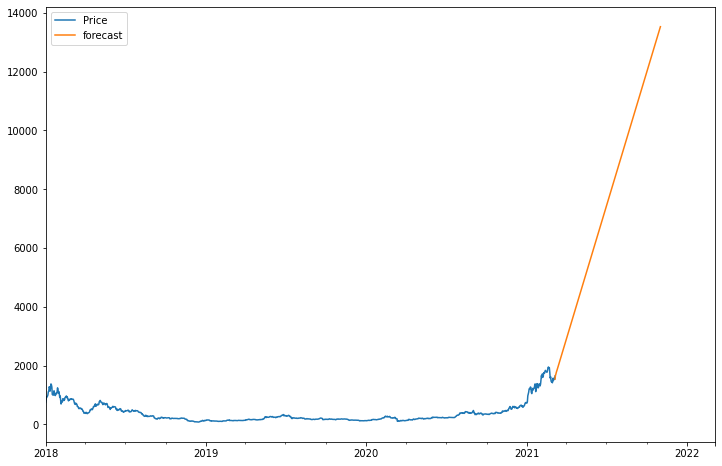

In [24]:
future_df=pd.concat([df,future_dates_df])
future_df['forecast']=model_fit.predict(start=1160,end=1400,dynamic=False)
future_df[['Price','forecast']].plot(figsize=(12,8))

In [25]:
from sklearn.model_selection import TimeSeriesSplit
data = pd.DataFrame(df["Price"])

#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=4)

#Find out no of observations in train and test sets
i=0
for train, test in tscv.split(data):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))

No of observations under train1=233
No of observations under test1=232
No of observations under train2=465
No of observations under test2=232
No of observations under train3=697
No of observations under test3=232
No of observations under train4=929
No of observations under test4=232


In [26]:
train1, test1 = data.iloc[:233, 0], data.iloc[233:465, 0]
train2, test2 = data.iloc[:465, 0], data.iloc[465:697, 0]
train3, test3 = data.iloc[:697, 0], data.iloc[697:929, 0]
train4, test4 = data.iloc[:929, 0], data.iloc[929:1160, 0]

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#First fold RMSE
model1 = sm.tsa.statespace.SARIMAX(train1, order=(2,2,0)).fit()
pred1 = model1.predict(start=test1.index[0], end=test1.index[-1])
RMSE1=round(sqrt(mean_squared_error(test1, pred1)),2)

#Second fold RMSE
model2 = sm.tsa.statespace.SARIMAX(train2, order=(2,2,0)).fit()
pred2 = model2.predict(start=test2.index[0], end=test2.index[-1])
RMSE2=round(sqrt(mean_squared_error(test2, pred2)),2)

#Third fold RMSE
model3 = sm.tsa.statespace.SARIMAX(train3, order=(2,2,0)).fit()
pred3 = model3.predict(start=test3.index[0], end=test3.index[-1])
RMSE3=round(sqrt(mean_squared_error(test3, pred3)),2)

model4 = sm.tsa.statespace.SARIMAX(train4, order=(2,2,0)).fit()
pred4 = model3.predict(start=test4.index[0], end=test4.index[-1])
RMSE4=round(sqrt(mean_squared_error(test4, pred4)),2)



print ("RMSE1:", RMSE1)
print ("RMSE2:", RMSE2)
print ("RMSE3:", RMSE3)
print ("RMSE4:", RMSE4)

Overall_RMSE=round((RMSE1+RMSE2+RMSE3+RMSE4)/4,2)
print ("Overall RMSE:", Overall_RMSE) 


RMSE1: 278.77
RMSE2: 97.57
RMSE3: 111.54
RMSE4: 456.35
Overall RMSE: 236.06


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/s

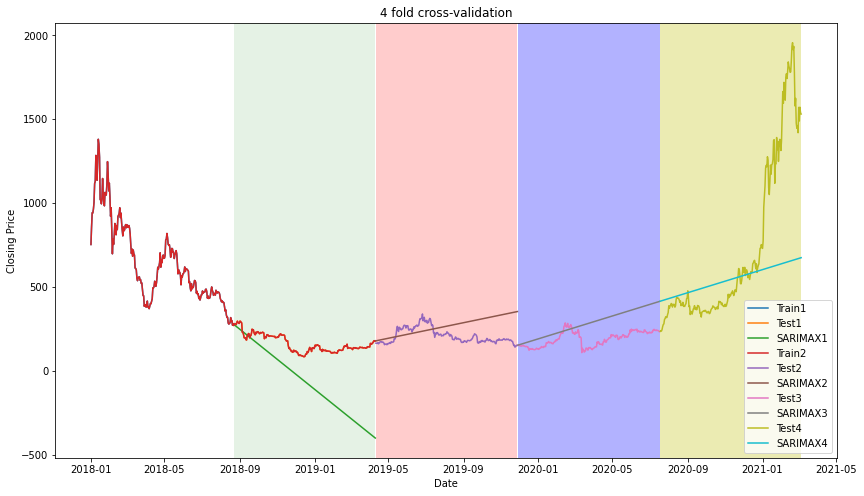

In [29]:
#plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

#Labels and titles
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("4 fold cross-validation")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1.index, pred1, label='SARIMAX1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2.index, pred2, label='SARIMAX2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3.index, pred3, label='SARIMAX3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3)

plt.plot(test4.index, test4, label='Test4')
plt.plot(pred4.index, pred4, label='SARIMAX4')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test4.index[0], test4.index[-1],  facecolor='y', alpha=0.3)
